### What this notebook will do
This notebook will deal with the generation of measurements on the annotation audio. Each annotation audio file will be split into smaller segments of 50ms length. 50ms is chosen as it is the same temporal scale as the longest calls. The idea is that if possible, one segment should contain at least one call. 

The 'valid_annotations' have been chosen in the 'choosing valid annotations...' Jupyter notebook. 'valid annotations' are those with only the target species, where there was detectable audio when a bat was flying, and those that have been double checked to be correctly annotated. See the notebook for more details. 

In this notebook, the audio corresponding to all the 'valid_annotations' will be  split-measured to generate the raw data for all further statistical analysis that will follow to compare single vs. multi bat call sequences. 


- Author: Thejasvi Beleyur
- Date of initiation: 2020-07-11

In [1]:
import datetime as dt
import sys 
sys.path.append('/home/tbeleyur/Documents/packages_dev/correct_call_annotations/')
sys.path.append('../')
sys.path.append('../../individual_call_analysis/analysis/')

import correct_call_annotations.correct_call_annotations as cca
import format_and_clean
from format_and_clean import ind_call_format as icf
import measure_annot_audio

from measure_annot_audio import split_measure
from measure_annot_audio.inbuilt_measurement_functions import dB
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
import tqdm

In [2]:
%matplotlib notebook

In [3]:
print(f'Notebook started at: {dt.datetime.now()}')

Notebook started at: 2020-09-07 19:30:45.418167


In [4]:
verif_annots = pd.read_csv('../verified_annotations.csv').reset_index(drop=True) # manually re-checked set of audio files.
# See ../choosing valid annotation audio files.ipynb

verif_annots

,Unnamed: 0,valid_annotations
0,0,matching_annotaudio_Aditya_2018-08-16_21502300_9
1,1,matching_annotaudio_Aditya_2018-08-16_21502300_12
2,2,matching_annotaudio_Aditya_2018-08-16_21502300_18
3,3,matching_annotaudio_Aditya_2018-08-16_21502300_19
4,4,matching_annotaudio_Aditya_2018-08-16_21502300_20
...,...,...
612,624,matching_annotaudio_Aditya_2018-08-20_0300-040...
613,625,matching_annotaudio_Aditya_2018-08-20_0300-040...
614,626,matching_annotaudio_Aditya_2018-08-20_0300-040...
615,627,matching_annotaudio_Aditya_2018-08-20_0300-040...


In [5]:
all_measures = []

In [6]:
fs = 250000
kwargs = {'inter_peak_difference':250, 
          'spectrum_smoothing_width': 100,
          'peak_range': 14,
          'fs':fs,
          'db_range':46}

In [7]:
for i, row in tqdm.tqdm(verif_annots.iterrows()):
    
    audio_folder = '../../individual_call_analysis/hp_annotation_audio/'
    file_path = cca.find_file_in_folder(verif_annots['valid_annotations'][i]+'_hp.WAV', audio_folder)
    measurements = split_measure.split_measure_audio(file_path[0],
                                  **kwargs)
    all_measures.append(measurements)



0it [00:00, ?it/s]

Match found!
Match found!


2it [00:00,  9.98it/s]

Match found!


3it [00:00,  6.27it/s]

Match found!


4it [00:01,  3.70it/s]

Match found!


5it [00:01,  2.38it/s]

Match found!


7it [00:03,  2.05it/s]

Match found!
Match found!


8it [00:03,  2.25it/s]

Match found!


9it [00:03,  2.54it/s]

Match found!


10it [00:04,  1.74it/s]

Match found!


11it [00:04,  2.08it/s]

Match found!


12it [00:05,  1.56it/s]

Match found!


13it [00:06,  1.53it/s]

Match found!


14it [00:07,  1.50it/s]

Match found!


15it [00:09,  1.03s/it]

Match found!


16it [00:09,  1.05it/s]

Match found!


18it [00:11,  1.31it/s]

Match found!
Match found!


19it [00:11,  1.52it/s]

Match found!


20it [00:12,  1.67it/s]

Match found!


21it [00:12,  1.55it/s]

Match found!


22it [00:13,  1.67it/s]

Match found!


23it [00:16,  1.28s/it]

Match found!


24it [00:16,  1.00s/it]

Match found!


25it [00:17,  1.02s/it]

Match found!


26it [00:18,  1.19it/s]

Match found!


28it [00:19,  1.52it/s]

Match found!
Match found!


29it [00:19,  1.66it/s]

Match found!


30it [00:20,  1.68it/s]

Match found!


31it [00:20,  1.77it/s]

Match found!


33it [00:22,  1.48it/s]

Match found!
Match found!


34it [00:23,  1.48it/s]

Match found!


35it [00:23,  1.84it/s]

Match found!


36it [00:23,  2.20it/s]

Match found!


37it [00:24,  2.59it/s]

Match found!
Match found!


39it [00:24,  3.12it/s]

Match found!
Match found!


42it [00:24,  4.19it/s]

Match found!
Match found!


44it [00:25,  5.21it/s]

Match found!
Match found!


45it [00:25,  3.20it/s]

Match found!


47it [00:26,  3.61it/s]

Match found!
Match found!


49it [00:26,  4.56it/s]

Match found!
Match found!


51it [00:26,  5.28it/s]

Match found!
Match found!


53it [00:27,  6.04it/s]

Match found!
Match found!


54it [00:27,  4.83it/s]

Match found!


55it [00:27,  4.69it/s]

Match found!


56it [00:28,  1.81it/s]

Match found!


58it [00:29,  2.23it/s]

Match found!
Match found!


59it [00:30,  2.46it/s]

Match found!


60it [00:30,  2.81it/s]

Match found!
Match found!


62it [00:30,  3.17it/s]

Match found!


63it [00:31,  3.31it/s]

Match found!


64it [00:31,  2.47it/s]

Match found!


65it [00:32,  2.07it/s]

Match found!


66it [00:33,  1.81it/s]

Match found!


67it [00:33,  2.18it/s]

Match found!


68it [00:33,  2.60it/s]

Match found!


70it [00:34,  2.01it/s]

Match found!
Match found!


71it [00:36,  1.05it/s]

Match found!


73it [00:37,  1.76it/s]

Match found!
Match found!


74it [00:37,  2.12it/s]

Match found!


75it [00:38,  1.71it/s]

Match found!


76it [00:39,  1.36it/s]

Match found!
Match found!


78it [00:39,  1.75it/s]

Match found!


79it [00:40,  1.68it/s]

Match found!


80it [00:41,  1.66it/s]

Match found!


82it [00:41,  2.71it/s]

Match found!
Match found!


83it [00:41,  2.56it/s]

Match found!


85it [00:42,  3.26it/s]

Match found!
Match found!


86it [00:43,  2.07it/s]

Match found!


87it [00:43,  2.43it/s]

Match found!


88it [00:44,  2.17it/s]

Match found!


89it [00:44,  2.33it/s]

Match found!
Match found!


92it [00:44,  3.35it/s]

Match found!
Match found!


93it [00:45,  3.84it/s]

Match found!


96it [00:45,  3.55it/s]

Match found!
Match found!
Match found!


97it [00:46,  3.31it/s]

Match found!


98it [00:46,  3.65it/s]

Match found!


99it [00:46,  3.70it/s]

Match found!


100it [00:47,  3.29it/s]

Match found!


101it [00:47,  3.47it/s]

Match found!


103it [00:47,  4.35it/s]

Match found!
Match found!


104it [00:48,  3.93it/s]

Match found!


105it [00:48,  3.09it/s]

Match found!


106it [00:49,  2.65it/s]

Match found!


108it [00:51,  1.41it/s]

Match found!
Match found!


110it [00:52,  1.79it/s]

Match found!
Match found!
Match found!


112it [00:53,  1.63it/s]

Match found!


113it [00:55,  1.02s/it]

Match found!


116it [00:56,  1.62it/s]

Match found!
Match found!
Match found!


117it [00:56,  1.78it/s]

Match found!


118it [00:57,  1.98it/s]

Match found!


121it [00:57,  2.81it/s]

Match found!
Match found!
Match found!


122it [00:57,  3.34it/s]

Match found!


123it [00:58,  3.62it/s]

Match found!


124it [00:58,  3.62it/s]

Match found!


126it [00:59,  3.61it/s]

Match found!
Match found!


127it [00:59,  3.43it/s]

Match found!


130it [00:59,  4.48it/s]

Match found!
Match found!
Match found!


132it [01:00,  4.01it/s]

Match found!
Match found!


134it [01:00,  4.75it/s]

Match found!
Match found!


137it [01:01,  4.78it/s]

Match found!
Match found!
Match found!


138it [01:01,  4.91it/s]

Match found!


139it [01:01,  4.64it/s]

Match found!
Match found!


141it [01:02,  3.72it/s]

Match found!


142it [01:03,  2.68it/s]

Match found!
Match found!


146it [01:06,  1.98it/s]

Match found!
Match found!
Match found!


148it [01:06,  2.75it/s]

Match found!
Match found!


150it [01:06,  3.37it/s]

Match found!
Match found!


151it [01:07,  3.55it/s]

Match found!


153it [01:07,  4.38it/s]

Match found!
Match found!


155it [01:07,  4.90it/s]

Match found!


156it [01:07,  5.69it/s]

Match found!
Match found!


157it [01:08,  4.98it/s]

Match found!


159it [01:08,  4.00it/s]

Match found!
Match found!


160it [01:09,  4.53it/s]

Match found!


163it [01:09,  5.61it/s]

Match found!
Match found!
Match found!


165it [01:09,  6.57it/s]

Match found!
Match found!


168it [01:09,  7.15it/s]

Match found!
Match found!
Match found!


170it [01:10,  5.04it/s]

Match found!
Match found!


172it [01:10,  5.68it/s]

Match found!
Match found!


173it [01:10,  5.64it/s]

Match found!


174it [01:11,  4.47it/s]

Match found!


176it [01:11,  4.35it/s]

Match found!
Match found!


178it [01:12,  4.50it/s]

Match found!
Match found!


179it [01:12,  5.21it/s]

Match found!


181it [01:13,  4.19it/s]

Match found!
Match found!
Match found!


183it [01:13,  5.14it/s]

Match found!


184it [01:13,  4.32it/s]

Match found!
Match found!


186it [01:13,  5.01it/s]

Match found!


188it [01:14,  3.70it/s]

Match found!


189it [01:14,  4.45it/s]

Match found!
Match found!


190it [01:15,  2.48it/s]

Match found!


192it [01:16,  2.71it/s]

Match found!
Match found!


194it [01:16,  3.82it/s]

Match found!
Match found!


195it [01:16,  3.49it/s]

Match found!


196it [01:17,  3.01it/s]

Match found!


198it [01:18,  2.08it/s]

Match found!
Match found!


200it [01:20,  1.93it/s]

Match found!
Match found!


201it [01:20,  2.03it/s]

Match found!


202it [01:20,  2.30it/s]

Match found!


204it [01:21,  3.38it/s]

Match found!
Match found!


205it [01:21,  2.66it/s]

Match found!
Match found!


207it [01:21,  3.38it/s]

Match found!


208it [01:22,  3.43it/s]

Match found!


209it [01:24,  1.00s/it]

Match found!
Match found!


211it [01:25,  1.16it/s]

Match found!


212it [01:26,  1.41it/s]

Match found!


213it [01:26,  1.65it/s]

Match found!
Match found!


215it [01:26,  2.15it/s]

Match found!
Match found!


217it [01:27,  2.57it/s]

Match found!


219it [01:27,  3.10it/s]

Match found!
Match found!
Match found!


222it [01:28,  4.55it/s]

Match found!
Match found!


223it [01:28,  4.81it/s]

Match found!


225it [01:30,  1.83it/s]

Match found!
Match found!


226it [01:30,  2.41it/s]

Match found!
Match found!


228it [01:31,  2.20it/s]

Match found!


229it [01:32,  2.10it/s]

Match found!


230it [01:33,  1.60it/s]

Match found!


231it [01:35,  1.00s/it]

Match found!


232it [01:36,  1.00it/s]

Match found!


233it [01:36,  1.08it/s]

Match found!


234it [01:37,  1.01it/s]

Match found!


235it [01:39,  1.03s/it]

Match found!
Match found!


237it [01:39,  1.25it/s]

Match found!


238it [01:39,  1.60it/s]

Match found!
Match found!


240it [01:40,  2.07it/s]

Match found!


241it [01:40,  2.30it/s]

Match found!
Match found!


243it [01:41,  2.50it/s]

Match found!


245it [01:41,  3.31it/s]

Match found!
Match found!


246it [01:41,  3.36it/s]

Match found!


247it [01:42,  2.43it/s]

Match found!
Match found!
Match found!


250it [01:42,  2.98it/s]

Match found!


251it [01:43,  2.57it/s]

Match found!


252it [01:43,  2.71it/s]

Match found!


255it [01:44,  3.81it/s]

Match found!
Match found!
Match found!


256it [01:44,  3.85it/s]

Match found!


259it [01:44,  4.48it/s]

Match found!
Match found!
Match found!


261it [01:45,  5.24it/s]

Match found!
Match found!


262it [01:45,  5.82it/s]

Match found!


263it [01:46,  2.09it/s]

Match found!
Match found!


265it [01:46,  2.60it/s]

Match found!


266it [01:47,  2.73it/s]

Match found!


267it [01:47,  2.89it/s]

Match found!


268it [01:48,  2.28it/s]

Match found!


269it [01:48,  2.47it/s]

Match found!
Match found!


272it [01:48,  3.61it/s]

Match found!
Match found!


273it [01:49,  3.51it/s]

Match found!


275it [01:49,  4.00it/s]

Match found!
Match found!


277it [01:49,  5.34it/s]

Match found!
Match found!


278it [01:50,  3.83it/s]

Match found!


279it [01:50,  2.89it/s]

Match found!


281it [01:51,  3.75it/s]

Match found!
Match found!


283it [01:51,  4.12it/s]

Match found!
Match found!


285it [01:52,  4.40it/s]

Match found!
Match found!


286it [01:52,  4.78it/s]

Match found!


287it [01:52,  3.86it/s]

Match found!
Match found!


289it [01:53,  3.62it/s]

Match found!


290it [01:53,  3.31it/s]

Match found!


293it [01:54,  4.26it/s]

Match found!
Match found!
Match found!


295it [01:54,  3.36it/s]

Match found!
Match found!


297it [01:55,  4.08it/s]

Match found!
Match found!


298it [01:55,  4.09it/s]

Match found!


299it [01:56,  2.95it/s]

Match found!


302it [01:56,  3.47it/s]

Match found!
Match found!
Match found!


304it [01:57,  4.49it/s]

Match found!
Match found!


305it [01:57,  4.81it/s]

Match found!


306it [01:58,  2.52it/s]

Match found!


307it [01:58,  1.91it/s]

Match found!


308it [01:59,  1.67it/s]

Match found!


309it [02:00,  1.86it/s]

Match found!


310it [02:00,  1.93it/s]

Match found!


311it [02:01,  1.79it/s]

Match found!
Match found!


313it [02:01,  2.22it/s]

Match found!


314it [02:02,  1.96it/s]

Match found!


315it [02:02,  2.32it/s]

Match found!


317it [02:03,  2.64it/s]

Match found!
Match found!


319it [02:03,  3.28it/s]

Match found!
Match found!


320it [02:03,  3.39it/s]

Match found!


321it [02:04,  2.84it/s]

Match found!


322it [02:05,  2.13it/s]

Match found!


323it [02:05,  2.30it/s]

Match found!


324it [02:05,  2.51it/s]

Match found!
Match found!


327it [02:06,  3.76it/s]

Match found!
Match found!
Match found!


329it [02:06,  4.55it/s]

Match found!
Match found!


333it [02:07,  3.77it/s]

Match found!
Match found!
Match found!


335it [02:08,  2.68it/s]

Match found!
Match found!
Match found!


338it [02:09,  3.99it/s]

Match found!
Match found!


340it [02:09,  4.07it/s]

Match found!
Match found!


341it [02:10,  3.46it/s]

Match found!


342it [02:10,  3.36it/s]

Match found!


343it [02:11,  1.96it/s]

Match found!


344it [02:11,  2.04it/s]

Match found!
Match found!


346it [02:12,  2.63it/s]

Match found!


347it [02:13,  1.95it/s]

Match found!
Match found!


349it [02:13,  2.53it/s]

Match found!


350it [02:13,  2.12it/s]

Match found!
Match found!


354it [02:14,  3.44it/s]

Match found!
Match found!
Match found!


355it [02:15,  2.65it/s]

Match found!
Match found!


357it [02:15,  3.30it/s]

Match found!


358it [02:15,  3.57it/s]

Match found!


359it [02:16,  2.72it/s]

Match found!


360it [02:17,  1.84it/s]

Match found!


362it [02:18,  2.07it/s]

Match found!
Match found!


364it [02:18,  3.42it/s]

Match found!
Match found!
Match found!


367it [02:19,  3.87it/s]

Match found!
Match found!


368it [02:19,  4.50it/s]

Match found!


370it [02:20,  2.33it/s]

Match found!
Match found!


371it [02:20,  2.80it/s]

Match found!


373it [02:21,  3.14it/s]

Match found!
Match found!


375it [02:22,  2.89it/s]

Match found!
Match found!


377it [02:22,  3.59it/s]

Match found!
Match found!


380it [02:23,  5.19it/s]

Match found!
Match found!
Match found!


381it [02:23,  4.65it/s]

Match found!
Match found!


384it [02:23,  5.90it/s]

Match found!
Match found!


386it [02:24,  3.65it/s]

Match found!
Match found!


388it [02:24,  4.43it/s]

Match found!
Match found!


389it [02:26,  1.99it/s]

Match found!


390it [02:27,  1.44it/s]

Match found!


391it [02:32,  1.95s/it]

Match found!


392it [02:32,  1.57s/it]

Match found!


393it [02:33,  1.27s/it]

Match found!


395it [02:33,  1.35it/s]

Match found!
Match found!


396it [02:33,  1.77it/s]

Match found!
Match found!


398it [02:34,  2.33it/s]

Match found!


399it [02:34,  2.01it/s]

Match found!


401it [02:35,  2.35it/s]

Match found!
Match found!


402it [02:35,  2.60it/s]

Match found!


403it [02:36,  2.59it/s]

Match found!


404it [02:36,  2.65it/s]

Match found!


407it [02:37,  3.94it/s]

Match found!
Match found!
Match found!
Match found!


410it [02:37,  4.45it/s]

Match found!
Match found!
Match found!


413it [02:38,  3.84it/s]

Match found!
Match found!


414it [02:41,  1.01it/s]

Match found!


416it [02:43,  1.19it/s]

Match found!
Match found!


418it [02:43,  1.64it/s]

Match found!
Match found!


420it [02:43,  2.52it/s]

Match found!
Match found!


422it [02:43,  3.32it/s]

Match found!
Match found!


424it [02:44,  2.80it/s]

Match found!
Match found!


425it [02:45,  1.93it/s]

Match found!


426it [02:47,  1.27it/s]

Match found!


427it [02:47,  1.49it/s]

Match found!


428it [02:47,  1.73it/s]

Match found!


429it [02:49,  1.14it/s]

Match found!
Match found!


432it [02:50,  1.91it/s]

Match found!
Match found!


433it [02:50,  1.92it/s]

Match found!


435it [02:53,  1.10it/s]

Match found!
Match found!
Match found!


438it [02:54,  1.86it/s]

Match found!
Match found!


439it [02:54,  2.25it/s]

Match found!


440it [02:54,  2.19it/s]

Match found!


442it [02:55,  3.07it/s]

Match found!
Match found!


444it [02:55,  4.00it/s]

Match found!
Match found!


447it [02:56,  5.38it/s]

Match found!
Match found!
Match found!


448it [02:56,  6.20it/s]

Match found!
Match found!


450it [02:56,  5.42it/s]

Match found!
Match found!


452it [02:57,  4.62it/s]

Match found!
Match found!


454it [02:57,  5.23it/s]

Match found!
Match found!


456it [02:58,  4.55it/s]

Match found!


457it [02:58,  3.62it/s]

Match found!


459it [02:59,  3.68it/s]

Match found!
Match found!


461it [02:59,  3.19it/s]

Match found!
Match found!


462it [03:01,  1.45it/s]

Match found!


463it [03:02,  1.31it/s]

Match found!


464it [03:02,  1.58it/s]

Match found!


465it [03:03,  1.76it/s]

Match found!


466it [03:03,  2.16it/s]

Match found!


469it [03:03,  3.08it/s]

Match found!
Match found!
Match found!
Match found!


471it [03:04,  3.42it/s]

Match found!
Match found!


475it [03:04,  5.36it/s]

Match found!
Match found!
Match found!


476it [03:05,  3.99it/s]

Match found!
Match found!


478it [03:05,  4.54it/s]

Match found!


479it [03:05,  4.49it/s]

Match found!
Match found!


481it [03:06,  4.05it/s]

Match found!


482it [03:06,  3.75it/s]

Match found!


483it [03:06,  3.63it/s]

Match found!


484it [03:07,  2.95it/s]

Match found!


486it [03:07,  3.58it/s]

Match found!
Match found!


487it [03:07,  4.21it/s]

Match found!
Match found!


490it [03:08,  4.09it/s]

Match found!
Match found!


491it [03:09,  4.64it/s]

Match found!
Match found!


493it [03:09,  4.25it/s]

Match found!


494it [03:09,  4.30it/s]

Match found!


495it [03:11,  1.85it/s]

Match found!


496it [03:11,  2.19it/s]

Match found!


497it [03:12,  1.67it/s]

Match found!
Match found!


499it [03:13,  1.51it/s]

Match found!


501it [03:14,  1.77it/s]

Match found!
Match found!


502it [03:16,  1.31it/s]

Match found!


503it [03:16,  1.44it/s]

Match found!


505it [03:17,  1.84it/s]

Match found!
Match found!


506it [03:17,  2.37it/s]

Match found!


509it [03:18,  2.83it/s]

Match found!
Match found!
Match found!


511it [03:18,  3.57it/s]

Match found!


513it [03:19,  4.59it/s]

Match found!
Match found!
Match found!
Match found!


515it [03:19,  4.64it/s]

Match found!


516it [03:20,  2.59it/s]

Match found!


517it [03:20,  2.47it/s]

Match found!


518it [03:21,  2.54it/s]

Match found!
Match found!


520it [03:21,  3.03it/s]

Match found!


521it [03:21,  2.91it/s]

Match found!


524it [03:22,  2.82it/s]

Match found!
Match found!
Match found!


525it [03:23,  2.19it/s]

Match found!


526it [03:24,  2.05it/s]

Match found!


529it [03:24,  2.52it/s]

Match found!
Match found!
Match found!
Match found!
Match found!


532it [03:25,  3.21it/s]

Match found!


533it [03:25,  3.31it/s]

Match found!


534it [03:25,  3.27it/s]

Match found!


535it [03:26,  2.94it/s]

Match found!


536it [03:26,  3.21it/s]

Match found!


537it [03:26,  3.07it/s]

Match found!


539it [03:27,  3.11it/s]

Match found!
Match found!


540it [03:27,  3.01it/s]

Match found!


541it [03:28,  3.23it/s]

Match found!


542it [03:28,  3.56it/s]

Match found!


544it [03:28,  4.15it/s]

Match found!
Match found!


545it [03:29,  2.43it/s]

Match found!


546it [03:29,  2.81it/s]

Match found!


549it [03:30,  3.93it/s]

Match found!
Match found!
Match found!


550it [03:30,  3.65it/s]

Match found!


553it [03:30,  4.75it/s]

Match found!
Match found!
Match found!


555it [03:31,  6.14it/s]

Match found!
Match found!


557it [03:31,  5.74it/s]

Match found!
Match found!


559it [03:31,  6.97it/s]

Match found!
Match found!


560it [03:31,  5.92it/s]

Match found!


561it [03:32,  5.05it/s]

Match found!


562it [03:32,  4.54it/s]

Match found!


563it [03:32,  4.07it/s]

Match found!


564it [03:32,  4.11it/s]

Match found!


565it [03:33,  4.03it/s]

Match found!


566it [03:33,  3.59it/s]

Match found!


567it [03:34,  1.68it/s]

Match found!


569it [03:35,  2.68it/s]

Match found!
Match found!


571it [03:35,  3.80it/s]

Match found!
Match found!


572it [03:35,  4.42it/s]

Match found!
Match found!


575it [03:36,  4.93it/s]

Match found!
Match found!


577it [03:36,  5.31it/s]

Match found!
Match found!


579it [03:36,  5.50it/s]

Match found!
Match found!


580it [03:37,  5.14it/s]

Match found!


581it [03:37,  3.86it/s]

Match found!
Match found!


583it [03:38,  3.85it/s]

Match found!


585it [03:38,  3.48it/s]

Match found!
Match found!


586it [03:38,  4.03it/s]

Match found!


587it [03:39,  3.59it/s]

Match found!


588it [03:39,  2.71it/s]

Match found!
Match found!


591it [03:40,  3.73it/s]

Match found!
Match found!


592it [03:40,  3.34it/s]

Match found!


593it [03:41,  2.79it/s]

Match found!


594it [03:41,  3.01it/s]

Match found!
Match found!


597it [03:42,  4.06it/s]

Match found!
Match found!


598it [03:42,  3.98it/s]

Match found!


599it [03:43,  1.63it/s]

Match found!


600it [03:44,  1.84it/s]

Match found!


602it [03:44,  2.50it/s]

Match found!
Match found!


604it [03:45,  3.54it/s]

Match found!
Match found!


606it [03:45,  4.57it/s]

Match found!
Match found!


608it [03:46,  2.82it/s]

Match found!
Match found!


610it [03:47,  1.89it/s]

Match found!
Match found!


611it [03:48,  2.28it/s]

Match found!
Match found!
Match found!


615it [03:48,  3.62it/s]

Match found!
Match found!


617it [03:48,  2.70it/s]

Match found!


In [8]:
all_split_measure = pd.concat(all_measures).reset_index(drop=True)

In [9]:
all_split_measure

,value,segment_number,measurement,file_name
0,0.032661,0,rms,matching_annotaudio_Aditya_2018-08-16_21502300...
1,0.102295,0,peak_amplitude,matching_annotaudio_Aditya_2018-08-16_21502300...
2,90200.000000,0,minus_XdB_frequency,matching_annotaudio_Aditya_2018-08-16_21502300...
3,104700.000000,0,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...
4,0.012252,1,rms,matching_annotaudio_Aditya_2018-08-16_21502300...
...,...,...,...,...
651612,103120.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...
651613,103600.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...
651614,103840.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...
651615,104540.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...


In [10]:
all_split_measure['unique_window_id'] = all_split_measure['segment_number'].astype(str) +'_'+all_split_measure['file_name'] 

In [11]:
all_split_measure

,value,segment_number,measurement,file_name,unique_window_id
0,0.032661,0,rms,matching_annotaudio_Aditya_2018-08-16_21502300...,0_matching_annotaudio_Aditya_2018-08-16_215023...
1,0.102295,0,peak_amplitude,matching_annotaudio_Aditya_2018-08-16_21502300...,0_matching_annotaudio_Aditya_2018-08-16_215023...
2,90200.000000,0,minus_XdB_frequency,matching_annotaudio_Aditya_2018-08-16_21502300...,0_matching_annotaudio_Aditya_2018-08-16_215023...
3,104700.000000,0,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,0_matching_annotaudio_Aditya_2018-08-16_215023...
4,0.012252,1,rms,matching_annotaudio_Aditya_2018-08-16_21502300...,1_matching_annotaudio_Aditya_2018-08-16_215023...
...,...,...,...,...,...
651612,103120.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...,12_matching_annotaudio_Aditya_2018-08-20_0300-...
651613,103600.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...,12_matching_annotaudio_Aditya_2018-08-20_0300-...
651614,103840.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...,12_matching_annotaudio_Aditya_2018-08-20_0300-...
651615,104540.000000,12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0300-040...,12_matching_annotaudio_Aditya_2018-08-20_0300-...


<IPython.core.display.Javascript object>


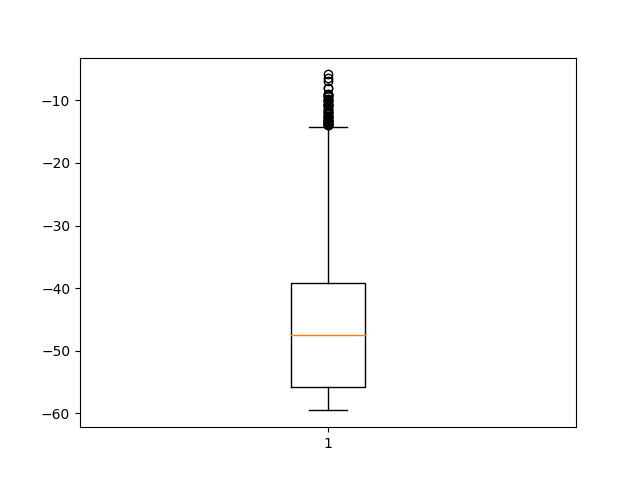

{'whiskers': [<matplotlib.lines.Line2D at 0x7feba32839e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7feba3283320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feba3283c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7feba2f47390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feba2f47780>],
 'means': []}

In [12]:
rms_values = all_split_measure[all_split_measure['measurement']=='rms']
plt.figure()
plt.boxplot(dB(rms_values['value']))

### Choosing only those above the silence threshold
Now all windows above the silence threshold need to be chosen. Previously, in the notebook *what qualifies as a silent audio segment* I'd set the $silence+20$dB threshold. Right now, I'm wondering if that threshold is too high, and that it'd mean losing out on a lot of data. But first let's see how much data is left with +10 and +20 dB thresholds. 

In [13]:
plus20dB_threshold = pd.read_csv('../call_threshold_levels.csv')
plus20dB_threshold

,Unnamed: 0,call_dbpeak_threshold,call_dbrms_threshold
0,0,-23.0,-37.0


In [14]:
measurement_df = all_split_measure

In [15]:
def choose_all_windows_above_threshold(measurement_df, threshold):
    '''
    Chooses all windows with rms greater or equal to the given rms threshold
    
    
    Parameters
    ----------
    measurement_df : pd.DataFrame
        A long dataframe with one measurement value per row
        Must have the columns 'measurement', 'unique_window_id'
        The 'measurement' column must also have some entries with 'rms' in them. 
    threshold : float>0
        The rms threshold to define windows which are not silent. 
    
    Returns 
    -------
    all_above_threshold : pd.DataFrame
        The dataframe with all segments across different files that are greater than or equal to the 
        chosen threshold rms. 
    '''

    rms_values = measurement_df[measurement_df['measurement']=='rms'].reset_index(drop=True)
    above_threshold = rms_values[rms_values['value']>=threshold]
    windowids_above_threshold = above_threshold['unique_window_id']
    all_above_threshold = measurement_df[measurement_df['unique_window_id'].isin(windowids_above_threshold)].reset_index(drop=True)
    return all_above_threshold


In [16]:
threshold_20db = float(10**(plus20dB_threshold['call_dbrms_threshold']/20.0))
threshold10db  = float(10**((plus20dB_threshold['call_dbrms_threshold']-10)/20.0))
threshold_20db, threshold10db

(0.01412537544622754, 0.0044668359215096305)

In [17]:
non_silent_measures = choose_all_windows_above_threshold(all_split_measure, threshold_20db)

<IPython.core.display.Javascript object>


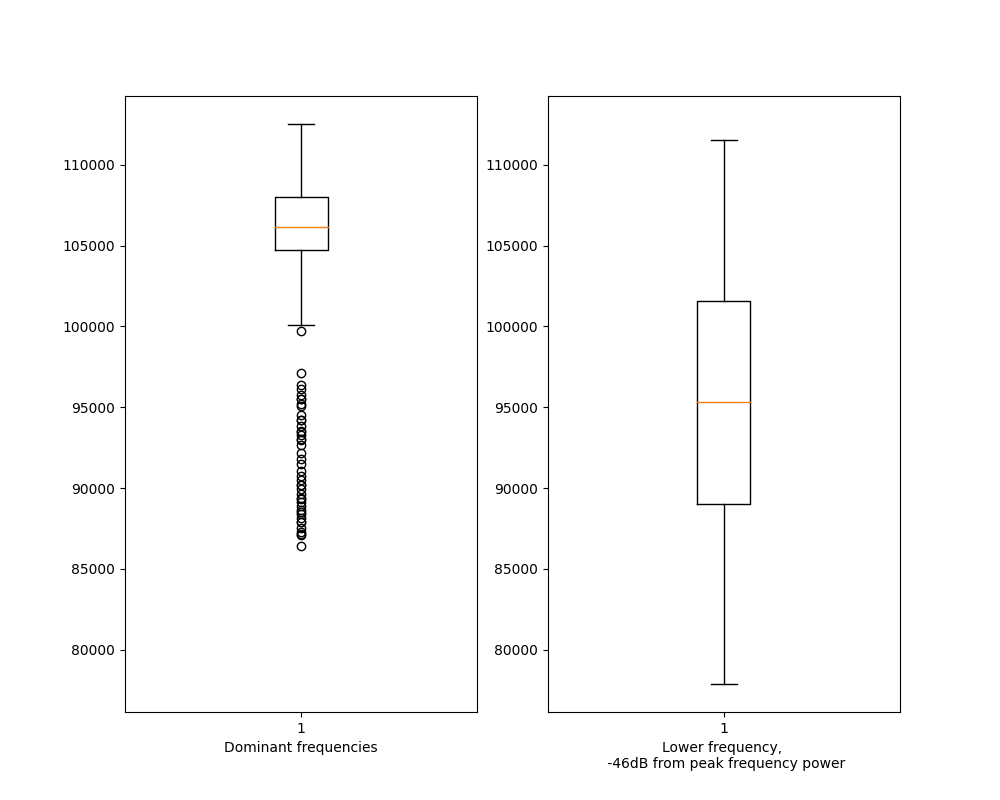

Text(0.5, 0, 'Lower frequency, \n -46dB from peak frequency power')

In [18]:
dom_freq = non_silent_measures[non_silent_measures['measurement']=='dominant_frequencies']
minusx_df = non_silent_measures[non_silent_measures['measurement']=='minus_XdB_frequency']



plt.figure(figsize=(10,8))
a0 = plt.subplot(121)
plt.boxplot(dom_freq['value'])
plt.xlabel('Dominant frequencies')
plt.subplot(122, sharey=a0)
plt.boxplot(minusx_df['value'])
plt.xlabel('Lower frequency, \n -46dB from peak frequency power')

<IPython.core.display.Javascript object>


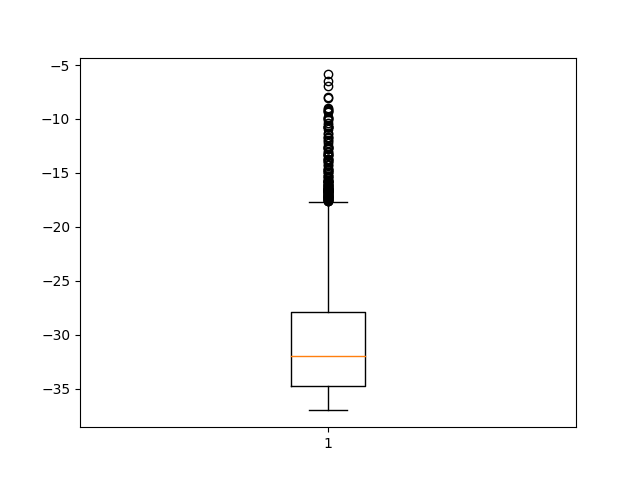

{'whiskers': [<matplotlib.lines.Line2D at 0x7feba102fe10>,
 'caps': [<matplotlib.lines.Line2D at 0x7feba1034588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feba102fcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7feba1034c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feba0fba048>],
 'means': []}

In [19]:
rms_df = non_silent_measures[non_silent_measures['measurement']=='rms']

plt.figure()
plt.boxplot(dB(rms_df['value']))

### Assigning the number of bats to each annotation audio
Now that we have all of our measurements in place, it's time to compare each of the measurements across single and multi bat contexts.

In [20]:
non_silent_measures['video_annot_id'] = non_silent_measures['file_name'].str.lstrip('matching_annotaudio_')
# remove the '_hp' from the video_annot_ida

non_silent_measures['video_annot_id'] = non_silent_measures['video_annot_id'].str.rstrip('_hp.WAV')

In [21]:
non_silent_measures['video_annot_id'][0]

'Aditya_2018-08-16_21502300_9'

In [22]:
video_annot_folder = '../../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
non_silent_measures['num_bats'] = icf.get_numbats_from_annotation_id(non_silent_measures['video_annot_id'], video_annot_folder)

#### The numbers below represent the *rows* with the following bat numbers in the annotation audio - and not the number of annotations itself!!

In [23]:
group_size, counts = np.unique(non_silent_measures['num_bats'], return_counts=True)
print(group_size, counts)

[1 2 3] [13505  5060   689]


In [24]:
non_silent_measures.to_csv('non_silent_measurements_20dBthreshold.csv')

In [25]:
print(f'Notebook ended at: {dt.datetime.now()}')

Notebook ended at: 2020-09-07 19:35:04.372968
